# Program Assigment P1 (Problem Sheet 3)
Héctor Andrade Loarca

- **a)** Lets define a function which computes a step lenght by the backtracking rules.

Find $l$ such that:
$$f(x+\alpha*d)\leq f(x)+ \sigma\alpha\nabla f(x)^Td$$
with $\alpha=\beta^l$.

In [1]:
function armijo(f,∇f,x,σ,d,β)
    #Lets obtain l until armijo rule holds
    l=0
    α=β^l
    while f(x+α*d)>f(x)+σ*α*dot(∇f(x),d)
        α=α*β
    end
    α
end

armijo (generic function with 1 method)

- **b)** Lets define a steepestdesc function which takes as inputs a function $f$, the gradient of the function $\nabla f$, a starting point $x_0$, the tolerance $\epsilon$, the descent direction $d$, and the maximum number of iterations. 

In [2]:
function steepestdec(f,∇f,x0,ϵ,maxit)
    #We create an array of the points in the iterations, with first entry, the starting point
    x=x0
    y=x
    i=1 
    #Start the iterations
    while i<=maxit && norm(∇f(x)) > ϵ
        #negative gradient descent direction
        d=-∇f(x)
        y=[y,x+armijo(f,∇f,x,σ,d,β)*d]
        x=x+armijo(f,∇f,x,σ,d,β)*d
        i+=1
    end
    #reshape the big bector
    reshape(y,2,int(length(y)/2))
end

steepestdec (generic function with 1 method)

- **c)** Lets test the implementation.

We will use as benchmark the Rosenbrock function:
$$ f(x1,x2)=100(x_2-x_1^2)^2+(1-x_1)^2 $$

Whose gradient can be easily defined

$$\nabla f(x_1,x_2)= \begin{bmatrix}
   -400(x_2-x_1^2)x_1-2(1-x_1)\\
   200(x_2-x_1^2)
\end{bmatrix}$$

Lets define the function and the gradient.

In [3]:
f(x)=100*(x[2]-x[1]^2)^2+(1-x[1])^2

f (generic function with 1 method)

In [4]:
∇f(x)=[-400*(x[2]-x[1]^2)*x[1]-2*(1-x[1]),200*(x[2]-x[1]^2)]

∇f (generic function with 1 method)

The parameters to use:

In [5]:
ϵ=1e-3
maxit=10000
σ=1e-3
β=1/2

0.5

First with the initial point $x_0=(1,-0.5)^\intercal$

In [6]:
x0=[1,-0.5]
y1=steepestdec(f,∇f,x0,ϵ,maxit)

2x5182 Array{Float64,2}:
  1.0  -1.34375   1.05507  1.23815  …  1.00077  1.00077  1.00077  1.00077
 -0.5   0.671875  1.55765  1.47084     1.00155  1.00155  1.00155  1.00155

Now with the initial point $x_0=(-1.2,1)^\intercal$

In [7]:
x0=[-1.2,1]
y2=steepestdec(f,∇f,x0,ϵ,maxit)

2x5232 Array{Float64,2}:
 -1.2  -0.989453  -1.06433  -1.02345  …  0.999208  0.99921   0.99921 
  1.0   1.08594    1.04417   1.06148     0.998416  0.998417  0.998418

- **c)** Now lets plot the trajectories with both starting points.

In [8]:
using PyPlot
using Distributions

INFO: Loading help data...


- First starting point $x_0=(1,-0.5)^\intercal$.

In [34]:
#Define the points to plot
N=100
X=linspace(-2,2,N)
Y=linspace(-2,2,N)
Xgrid=repmat(X',N,1)
Ygrid=repmat(Y,1,N)
Z=zeros(N,N)
for i in 1:N
    for j in 1:N
        Z[i:i,j:j] = f([X[i],Y[j]])
    end
end

X1=transpose(y1[1,:])
Y1=transpose(y1[2,:])
M=length(X1)
Z1=[f([X1[i],Y1[i]]) for i in 1:M];

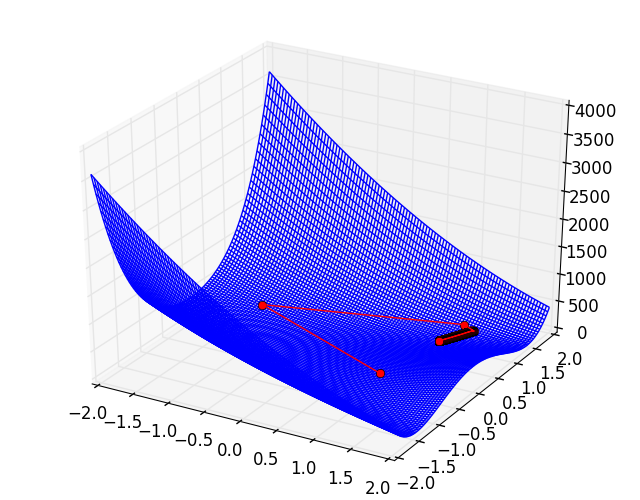

1-element Array{Any,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x13f1bc990>

In [37]:
plot_wireframe(Xgrid,Ygrid,Z)
plot(X1, Y1, Z1, "ro")
plot(X1, Y1, Z1, "r")

- Finally with starting point $x_0=(-1.2,1)^\intercal$.

In [41]:
#Define the points to plot
N=100
X=linspace(-2,2,N)
Y=linspace(-2,2,N)
Xgrid=repmat(X',N,1)
Ygrid=repmat(Y,1,N)
Z=zeros(N,N)
for i in 1:N
    for j in 1:N
        Z[i:i,j:j] = f([X[i],Y[j]])
    end
end

X2=transpose(y2[1,:])
Y2=transpose(y2[2,:])
M=length(X2)
Z2=[f([X2[i],Y2[i]]) for i in 1:M];

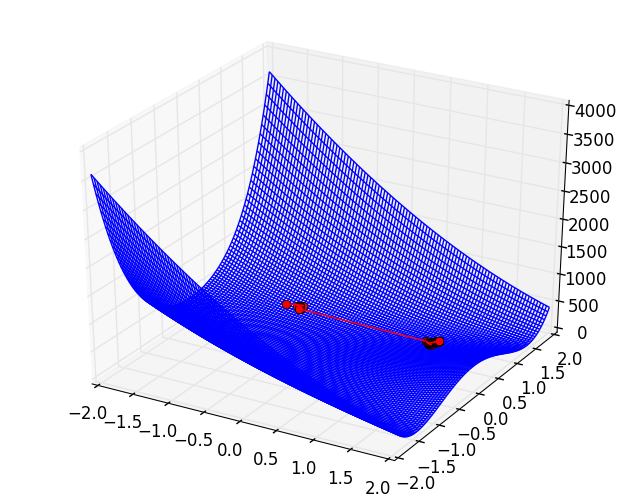

1-element Array{Any,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x1404c9490>

In [42]:
plot_wireframe(Xgrid,Ygrid,Z)
plot(X1, Y2, Z2, "ro")
plot(X1, Y2, Z2, "r")